<a href="https://colab.research.google.com/github/je-santos/MPLBM-UT/blob/master/examples/create_2D_training_data_4NN/VelNet_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vel-net
--------------
## Table of contents
- Libraries and examples
- Data visualization
- Data analysis
- Simplier methods: Linear regression
- Intro to NN: parabolic profile
- Intro to convnets

In [1]:
#@title Importing libraries and downloading data
#%%capture

!pip install git+https://github.com/je-santos/livelossplot

import os
import sys
import random

# Importing the numerical and viz libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing utilities libs 
import glob
from PIL import Image

# Importing the ML libs
import sklearn
import tensorflow as tf
from tensorflow import keras


from livelossplot import PlotLossesKeras
from livelossplot.plot_losses  import MatplotlibPlot
    
import warnings
warnings.simplefilter("ignore")

try:
  os.mkdir('numpys')
except:
  pass 


!git clone https://github.com/je-santos/PoreFlow-Net.git
!mv PoreFlow-Net/ilustrations/numpys.zip numpys/numpys.zip
os.chdir('numpys')


from zipfile import ZipFile
with ZipFile('numpys.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
os.chdir('..')

X = np.load('numpys/X.npy')
y = np.load('numpys/y.npy').astype(np.float32)
print(f'The shape of X is {X.shape} and the shape of y is {y.shape}: (Number of examples, x and y)')
X_mean = np.mean(X, axis=(1,2))
y_mean = np.mean(y, axis=(1,2))*10000 #normalize the data


  Cloning https://github.com/je-santos/livelossplot to c:\users\jae3287\appdata\local\temp\pip-req-build-v8gu2awc
  Created wheel for livelossplot: filename=livelossplot-0.5.0-py3-none-any.whl size=20505 sha256=f947e5c7481ac22c0edc62011f42f9c0847d9e35bc880ba0981a0552a319327e
  Stored in directory: C:\Users\jae3287\AppData\Local\Temp\pip-ephem-wheel-cache-7yhx1lha\wheels\d1\85\7f\91c563589b9efae46dcb114d7983ea917ecaa1f37efb85023c
Successfully built livelossplot


fatal: destination path 'PoreFlow-Net' already exists and is not an empty directory.
'mv' is not recognized as an internal or external command,
operable program or batch file.


The shape of X is (866, 128, 256) and the shape of y is (866, 128, 256): (Number of examples, x and y)


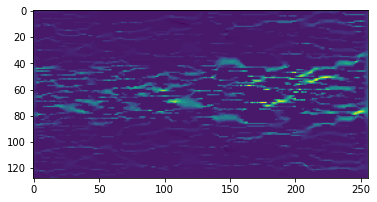

In [23]:
plt.imshow(y[0].astype(np.float64))

<AxesSubplot:>

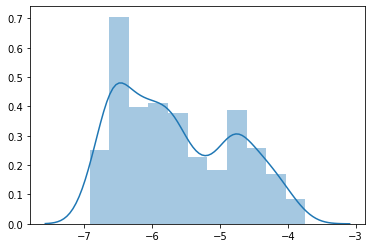

In [47]:
sns.distplot(np.log10(y_mean+.0000001))

In [61]:
ind_min = np.where(np.log10(y_mean)<-7)
ind_max = np.where(np.log10(y_mean)>-4)

In [62]:
print(ind_max)

(array([ 42, 189, 196, 205, 208, 211, 224, 239, 463, 469, 495, 538, 549,
       563, 601, 611], dtype=int64),)


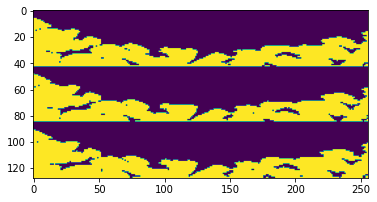

In [66]:
plt.imshow(X[42].astype(np.float32))

In [72]:
# performing splits
split      = 0.8
num_train  = int(split*X.shape[0])
print(f'Total samples in the data set: {X.shape[0]}, we will use {num_train} for training')

Total samples in the data set: 866, we will use 692 for training


In [77]:
model_name = 'test_class'
# we create a number with the model name (unique)
rnd_seed = np.sum( [ord(letter) for letter in model_name] )*123123
# we use this num as the rnd seed for numpy
np.random.seed( rnd_seed )
IDs = np.arange( X.shape[0] ) 
np.random.shuffle( IDs )
X_train, y_train = X[IDs[:num_train]], y[IDs[:num_train]]
X_test,  y_test  = X[IDs[num_train:]], y[IDs[num_train:]]


In [78]:
y_test.shape

(174, 128, 256)

In [79]:
174+692

866

In [100]:
linear_model = keras.Sequential([keras.layers.Dense(1,input_shape=[1])])
linear_model.compile(loss='mse',optimizer=keras.optimizers.Adam())
linear_model.summary()

In [121]:
non_linear_model = keras.Sequential([keras.layers.Dense(10,activation='selu',input_shape=[1])])
non_linear_model.compile(loss='mse',optimizer=keras.optimizers.Adam())
non_linear_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


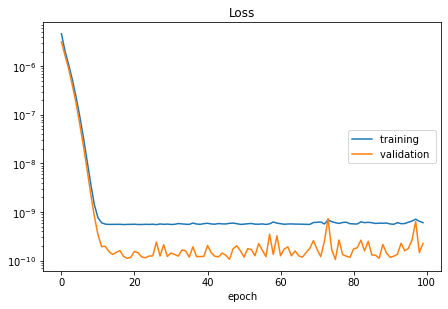

Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
22/22 [==============================] - 0s 18ms/step - loss: 6.0331e-10 - val_loss: 2.2538e-10


In [114]:
linear_model.fit(x=X_mean, y=y_mean, callbacks=PlotLossesKeras(), epochs=40, validation_split=0.2)

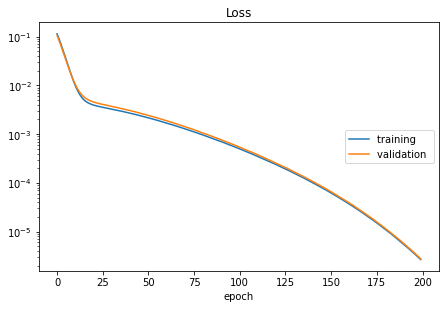

Loss
	training         	 (min:    0.000, max:    0.115, cur:    0.000)
	validation       	 (min:    0.000, max:    0.106, cur:    0.000)
22/22 [==============================] - 0s 19ms/step - loss: 2.6760e-06 - val_loss: 2.7507e-06


In [122]:
non_linear_model.fit(x=X_mean, y=y_mean, callbacks=PlotLossesKeras(), epochs=200, validation_split=0.2)

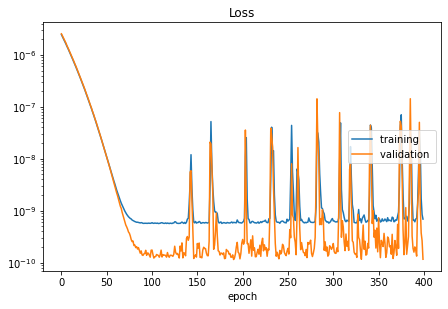

Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
22/22 [==============================] - 0s 19ms/step - loss: 6.8751e-10 - val_loss: 1.1583e-10


In [123]:
non_linear_model.fit(x=X_mean, y=y_mean, callbacks=PlotLossesKeras(), epochs=400, validation_split=0.2)